In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import time
import re

Functions to extract info

In [5]:
def get_title(soup):
    try:
        return soup.find("span", attrs={"id": 'productTitle'}).text.strip()
    except AttributeError:
        return ""


def get_price(soup):
    try:
        
        price_tags = soup.find_all(text=re.compile(r"\$\d{1,3}(?:,\d{3})*(?:\.\d{2})?"))
        prices = [price.strip() for price in price_tags]
        return prices[0] if prices else ""
    except Exception:
        return ""

def get_rating(soup):
    try:
        return soup.find("span", class_="a-color-base").text.strip()
    except AttributeError:
        return ""


def get_review_count(soup):
    try:
        return soup.find("span", attrs={'id': 'acrCustomerReviewText'}).text.strip()
    except AttributeError:
        return ""

def get_availability(soup):
    try:
        return soup.find("div", attrs={'id': 'availability'}).find("span").text.strip()
    except AttributeError:
        return "Not Available"



In [6]:
if __name__ == '__main__':

    HEADERS = ({
        'User-Agent': 'My User Agent',
        'Accept-Language': 'en-US, en;q=0.5'
    })

    base_url = "https://www.amazon.com/s?k=playstation+4&page="
    data = {"title": [], "price": [], "rating": [], "reviews": [], "availability": []}

    for page in range(1, 7):  
        print(f"Scraping Page {page}")
        url = base_url + str(page)
        response = requests.get(url, headers=HEADERS)
        soup = BeautifulSoup(response.content, "html.parser")
        product_links = []

        # Extract product links from current page
        results = soup.find_all("a", attrs={'class': 'a-link-normal s-no-outline'})
        for tag in results:
            link = tag.get('href')
            if link:
                product_links.append("https://www.amazon.com" + link)

        # Extract data from each product
        for idx, link in enumerate(product_links):
            print(f"  -> Product {idx + 1} on page {page}")
            try:
                product_page = requests.get(link, headers=HEADERS)
                product_soup = BeautifulSoup(product_page.content, "html.parser")

                data['title'].append(get_title(product_soup))
                data['price'].append(get_price(product_soup))
                data['rating'].append(get_rating(product_soup))
                data['reviews'].append(get_review_count(product_soup))
                data['availability'].append(get_availability(product_soup))

                time.sleep(1)  
            except Exception as e:
                print(f"     Failed to scrape {link}: {e}")
                continue


Scraping Page 1
  -> Product 1 on page 1


/var/folders/tj/5xs0mwrj72193gj4zmbbhzqw0000gn/T/ipykernel_24391/1663437471.py:11: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  price_tags = soup.find_all(text=re.compile(r"\$\d{1,3}(?:,\d{3})*(?:\.\d{2})?"))


  -> Product 2 on page 1
  -> Product 3 on page 1
  -> Product 4 on page 1
  -> Product 5 on page 1
  -> Product 6 on page 1
  -> Product 7 on page 1
  -> Product 8 on page 1
  -> Product 9 on page 1
  -> Product 10 on page 1
  -> Product 11 on page 1
  -> Product 12 on page 1
  -> Product 13 on page 1
  -> Product 14 on page 1
  -> Product 15 on page 1
  -> Product 16 on page 1
  -> Product 17 on page 1
  -> Product 18 on page 1
  -> Product 19 on page 1
  -> Product 20 on page 1
  -> Product 21 on page 1
  -> Product 22 on page 1
  -> Product 23 on page 1
  -> Product 24 on page 1
Scraping Page 2
  -> Product 1 on page 2
  -> Product 2 on page 2
  -> Product 3 on page 2
  -> Product 4 on page 2
  -> Product 5 on page 2
  -> Product 6 on page 2
  -> Product 7 on page 2
  -> Product 8 on page 2
  -> Product 9 on page 2
  -> Product 10 on page 2
  -> Product 11 on page 2
  -> Product 12 on page 2
  -> Product 13 on page 2
  -> Product 14 on page 2
  -> Product 15 on page 2
  -> Product 

Clean and save data

In [7]:
df = pd.DataFrame(data)
df['title'].replace('', np.nan, inplace=True)
df.dropna(subset=['title'], inplace=True)
df.to_csv("amazon_data.csv", index=False, encoding='utf-8')
print(f"\nScraping completed. Total rows scraped: {len(df)}")


Scraping completed. Total rows scraped: 28


In [8]:
df

,title,price,rating,reviews,availability
16,"BRENDEZ Replacement Set of Cables,- HDMI Cable...",$8.15,4.3,63 ratings,
17,"6amLifestyle PS4 Charger Cord, 10ft 3 Pack And...",$41.99,4.6,489 ratings,
18,"USB to USB C Adapter,Type C Female to A Male O...",$3.15,4.7,37 ratings,
19,Turtle Beach Stealth 700 Gen 3 Wireless Multip...,$177.30,,373 ratings,In Stock
20,Turtle Beach Stealth 600 Wireless Multiplatfor...,$99.00,,"2,380 ratings",In Stock
21,SoundMaster Pro V1 - Gaming Earphones with Dua...,$38.49,4.6,474 ratings,
22,GT OMEGA Apex Racing Wheel Stand for Logitech ...,$74.99,4.6,"2,491 ratings",
23,ShanWan Bluetooth Gamepad Keychain Sized Mini ...,<$25,4.4,160 ratings,
24,"AC Power Cord 6FT(2 Pack), 2 Prong TV Power Co...",$6.86,4.7,176 ratings,
25,"BRENDEZ Replacement Set of Cables,- HDMI Cable...",$8.15,4.3,63 ratings,


In [9]:
df.size

140

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 16 to 123
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         28 non-null     object
 1   price         28 non-null     object
 2   rating        28 non-null     object
 3   reviews       28 non-null     object
 4   availability  28 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


Data Processing

In [ ]:
import pandas as pd


# Clean 'price' column: remove currency symbols and convert to float
df['price'] = df['price'].str.replace('[₹$,]', '', regex=True).astype(float)

# Clean 'rating' column: convert to float (handle missing or malformed)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Clean 'reviews' column: remove commas and convert to int
df['reviews'] = df['reviews'].str.replace(',', '').astype(int)

# Clean 'availability' (optional - check unique values)
df['availability'] = df['availability'].str.strip()


Analysis

In [12]:
print(df.describe())
print("\nRating Distribution:\n", df['rating'].value_counts())
print("\nAvailability Status:\n", df['availability'].value_counts())


                                                    title  price rating  \
count                                                  28     28     28   
unique                                                 14     13      8   
top     BRENDEZ Replacement Set of Cables,- HDMI Cable...  $8.15    4.7   
freq                                                    6      6     10   

           reviews availability  
count           28           28  
unique          14            2  
top     63 ratings               
freq             6           26  

Rating Distribution:
 rating
4.7    10
4.3     6
4.6     6
        2
4.4     1
4.1     1
3.4     1
4.5     1
Name: count, dtype: int64

Availability Status:
 availability
            26
In Stock     2
Name: count, dtype: int64


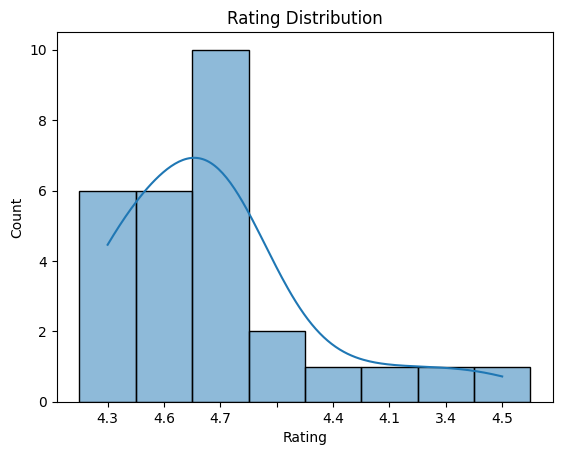

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating distribution
sns.histplot(df['rating'], bins=5, kde=True)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [17]:
# Top 5 most expensive
print(df.sort_values(by='price', ascending=False).head())

                                                 title   price rating  \
23   ShanWan Bluetooth Gamepad Keychain Sized Mini ...    <$25    4.4   
20   Turtle Beach Stealth 600 Wireless Multiplatfor...  $99.00          
16   BRENDEZ Replacement Set of Cables,- HDMI Cable...   $8.15    4.3   
105  BRENDEZ Replacement Set of Cables,- HDMI Cable...   $8.15    4.3   
103  BRENDEZ Replacement Set of Cables,- HDMI Cable...   $8.15    4.3   

           reviews availability  
23     160 ratings               
20   2,380 ratings     In Stock  
16      63 ratings               
105     63 ratings               
103     63 ratings               


In [18]:
# Top 5 most reviewed
print(df.sort_values(by='reviews', ascending=False).head())

                                                 title   price rating  \
65   PowerBear 4K HDMI Cable 10 ft | High Speed Hdm...  $12.61    4.7   
16   BRENDEZ Replacement Set of Cables,- HDMI Cable...   $8.15    4.3   
25   BRENDEZ Replacement Set of Cables,- HDMI Cable...   $8.15    4.3   
105  BRENDEZ Replacement Set of Cables,- HDMI Cable...   $8.15    4.3   
103  BRENDEZ Replacement Set of Cables,- HDMI Cable...   $8.15    4.3   

            reviews availability  
65   80,618 ratings               
16       63 ratings               
25       63 ratings               
105      63 ratings               
103      63 ratings               
